# **0. Initializng...**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
c1 = '#AAAAAA'
bgc = '#262626'
labc = '#CCCCCC'
clr = ['#88C1E0','#F0CB10','#AA6666']

plt.rc('font', size = 15)          # ctrl plot default txt sizes
plt.rcParams['text.color'] = c1
plt.rcParams['xtick.color'] = c1
plt.rcParams['ytick.color'] = c1
plt.rcParams['axes.labelcolor'] = c1
plt.rcParams['axes.edgecolor'] = c1
plt.rcParams['axes.facecolor'] = bgc
plt.rcParams['figure.facecolor'] = bgc

plt.figure(figsize=(8,6), dpi=300)

#### **1. Input**
# **Data**

In [ ]:
#Capacitor(104)
C = 1e-7

#resistance
R = []
R.append(list(range(2000,10001,2000)))    #2k-10k
R.append(list(range(20000,100001,20000)))   #20k-100k
R.append(list(range(200000,1000001,200000)))  #20k-100k

#Resistor using kohm as unit
Rk=[[],[],[]]
for i in range(3):
  for j in range(5):
    Rk[i].append(R[i][j]/1000)

#High Frequency
Fh = []
Fh.append([1952.4,1033.3,701.41,529.58,426.69])
Fh.append([214.7,107.52,71.5,54.06,43.238])
Fh.append([21.15,10.5,6.9,5.22,4.16])

#flatten 2d list to 1d list
def flatten_list(_2d_list):
  flat_list = []
  for element in _2d_list:
    if type(element) is list:
      for item in element:
        flat_list.append(item)
    else:
      flat_list.append(element)
  return flat_list

#All Resistor
Rn = flatten_list(R)
Rkn = flatten_list(Rk)

####**2. Calculate**
# **Periods**
$T=\frac{1}{F}$

In [ ]:
#Short Period
Ps = [[],[],[]]
for i in range(0,3):
  for j in range(0,5):
    Ps[i].append(1/Fh[i][j])
Psn = flatten_list(Ps)

####**3. Calculate**
# **Ideal Value**

$T_{ideal}=2RC$

$F=\frac{1}{T_{ideal}}$

In [ ]:
#Ideal Short Period
iPs = [[],[],[]]
for i in range(0,3):
  for j in range(0,5):
    ips = 2*R[i][j]*C
    iPs[i].append(ips)
iPsn = flatten_list(iPs)

#Ideal High Frequency
iFh = [[],[],[]]
for i in range(0,3):
  for j in range(0,5):
    ifh = 1/iPs[i][j]
    iFh[i].append(ifh)
iFhn = flatten_list(iFh)

####**4. Calculate**
# **Regression Line**

In [ ]:
R_ = sp.Symbol('R')
C_ = sp.Symbol('C')
L  = sp.Symbol('L')

x = np.array(R)
y = np.array(Ps)
xn = np.array(Rn)
yn = np.array(Psn)

m = []
b = []

for i in range(3):
  w, p = np.polyfit(x[i], y[i], 1)
  m.append(w/C)
  b.append(p)
  print('\n[R = ',2*10**i,'k~',10*10**i,'kΩ]',sep='')
  print('Regression Line :')
  #ignore constant b if it is smaller than 1e-3
  if abs(b[-1]) < 1e3:
    s=''
  else :
    if b[-1]>0:
      '+ %.3f'%b[-1]
    else :
      '- %.3f'%b[-1]
  print('L = ','%.3f'%m[-1],'RC',s)
  std = np.std(y[i])
  print('Standard deviation :', '%.6f'%std)

#All
w, p = np.polyfit(xn,yn, 1)
m.append(w/C)
b.append(p)
print('\n[All Data]')
print('Regression Line :')
#ignore constant b if it is smaller than 1e-3
if abs(b[-1]) < 1e3:
  s=''
else :
  if b[-1]>0:
    '+ %.3f'%b[-1]
  else :
    '- %.3f'%b[-1]
print('L = ','%.3f'%m[-1],'RC',s)
std = np.std(yn)
print('Standard deviation :', '%.6f'%std)


[R = 2k~10kΩ]
Regression Line :
L =  2.292 RC 
Standard deviation : 0.000648

[R = 20k~100kΩ]
Regression Line :
L =  2.307 RC 
Standard deviation : 0.006525

[R = 200k~1000kΩ]
Regression Line :
L =  2.413 RC 
Standard deviation : 0.068244

[All Data]
Regression Line :
L =  2.404 RC 
Standard deviation : 0.075602


####**5. Plot**
# **Measured Data** 
**With Regression Line & Ideal Function**

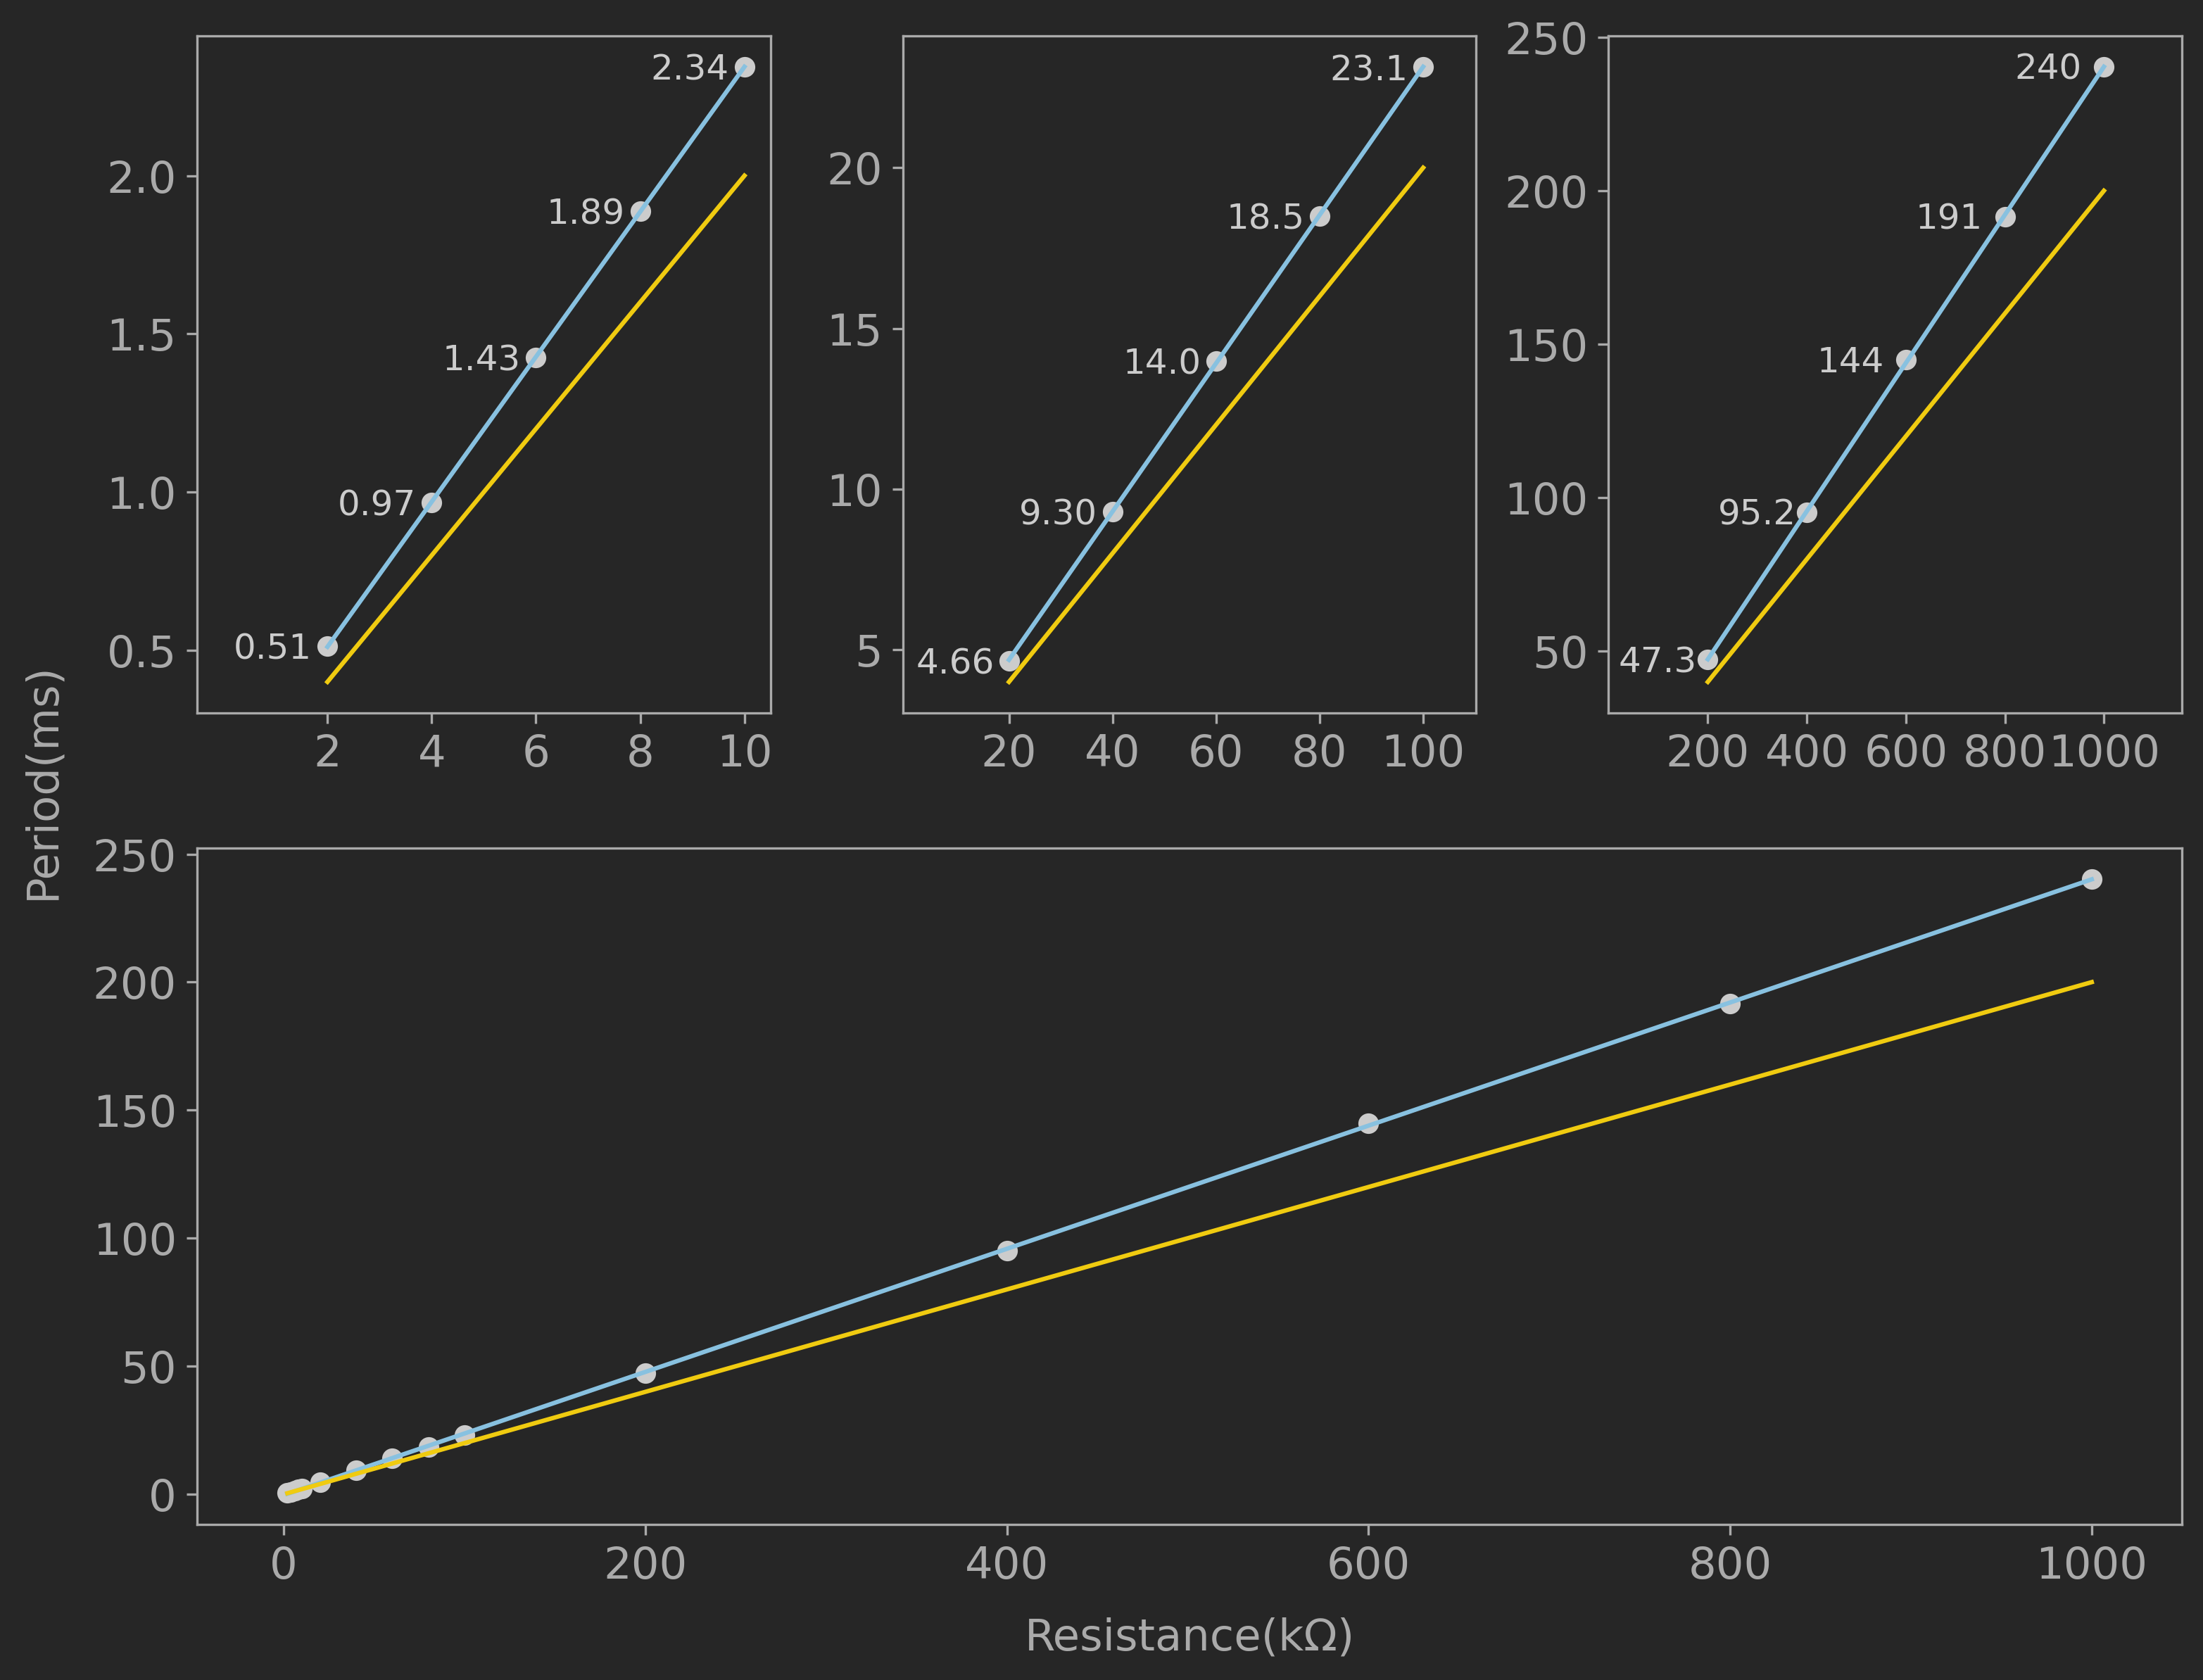

In [ ]:
plt.figure(figsize=(8,6), dpi=300)

for i in range(3):
  ax0 = plt.subplot2grid((2,6),(0,2*i),colspan=2)
  #data(dot)
  ax0.plot(x[i]/1000, y[i]*1000, 'o',color = labc)
  #data labels with proper digits
  for j in range(5):
    s=y[i][j]*1000 
    if s<10 :
      l = '%.2f' % s
    elif s>=10 :
      l = '%.1f' % s
      if s>=100 :
        l = int(s)
    ax0.annotate(l, xy=((x[i][j])/1000-1.8*(10**i),(y[i][j])*1000-0.04*(10**i)),fontsize=12,color = labc)
  #Regression line
  ax0.plot(x[i]/1000, 1000*(m[i]*x[i]*C + b[i]),color = clr[0])
  #Ideal
  ax0.plot(x[i]/1000,2000*x[i]*C,color = clr[1])
  plt.xticks(Rk[i])
  plt.xlim(-0.5,10.5**(i+1))
plt.subplot2grid((2, 6), (1, 0), colspan=6)
plt.xlabel('Resistance(kΩ)',labelpad=10)
plt.ylabel('Period(ms)',y=1.1,labelpad=10)
plt.plot(xn/1000, yn*1000, 'o',color = labc)
plt.plot(xn/1000, 1000*(m[-1]*xn*C + b[-1]),color = clr[0])
plt.plot(xn/1000,2000*xn*C,color = clr[1])
plt.subplots_adjust(wspace=0.6,hspace=0.2,top=1.3,right=1.3)

#### **6. Calculate**
# **Error Rate (Period)**
$Err = \frac{|Ideal - Measured|}{Ideal} \times 100 \% $

In [ ]:
Err = [[],[],[]]
for i in range(0,3):
  for j in range(0,5):
    err = abs(iPs[i][j]-Ps[i][j])/iPs[i][j]
    Err[i].append(err*100)
Errn = flatten_list(Err)

#### **7. Plot**
# **Err** (y-axis) **vs Resistance** (x-axis)

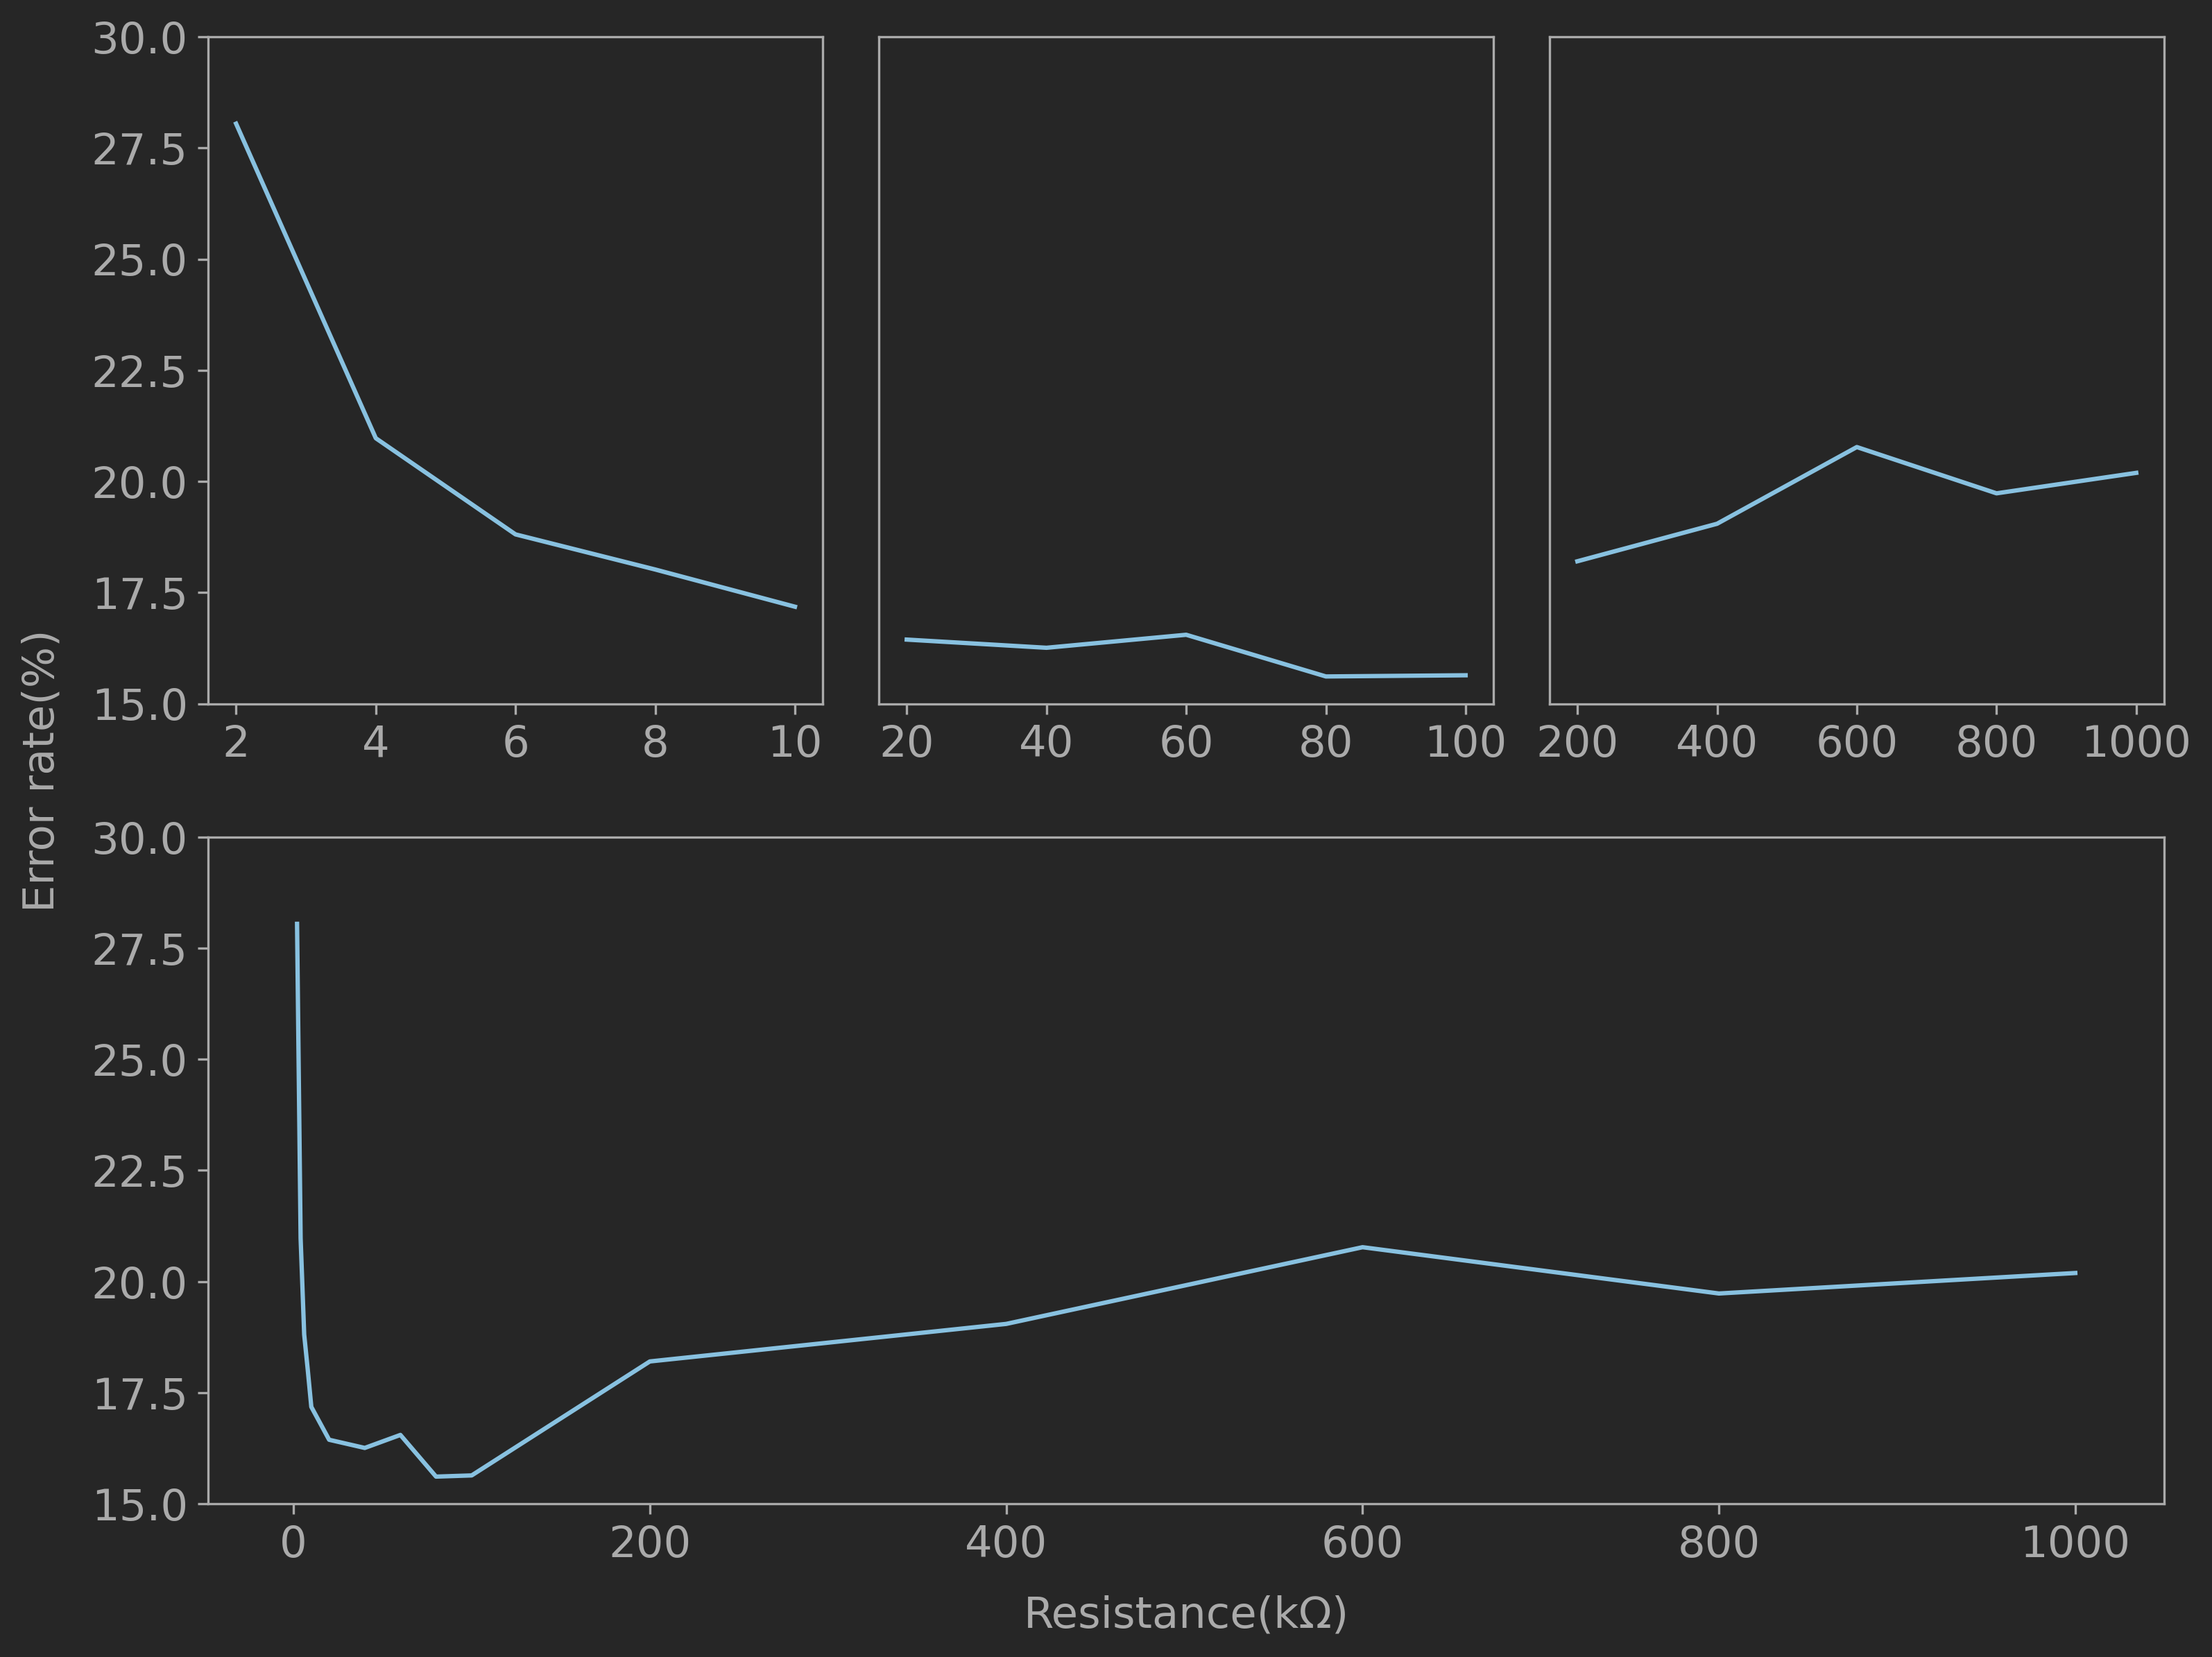

In [ ]:
plt.figure(figsize=(8,6), dpi=300)

for i in range(3):
  ax0 = plt.subplot2grid((2,6),(0,2*i),colspan=2)
  ax0.plot(Rk[i],Err[i], color = clr[0])
  plt.xticks(Rk[i])
  plt.ylim(15,30)
  if i != 0:
    ax = plt.gca()
    ax.axes.yaxis.set_ticks([])
plt.subplot2grid((2, 6), (1, 0), colspan=6)
plt.xlabel('Resistance(kΩ)',labelpad=10)
plt.ylabel('Error rate(%)',y=1.1,labelpad=10)
plt.plot(Rkn,Errn, color = clr[0])
plt.ylim(15,30)
plt.subplots_adjust(wspace=0.2,hspace=0.2,top=1.3,right=1.3)

<br>
<br>
<br>
<br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# ._______________________________________________________.
# ._______________________________________________________.
# ._______________________________________________________.
# ._______________________________________________________.
# ._______________________________________________________.

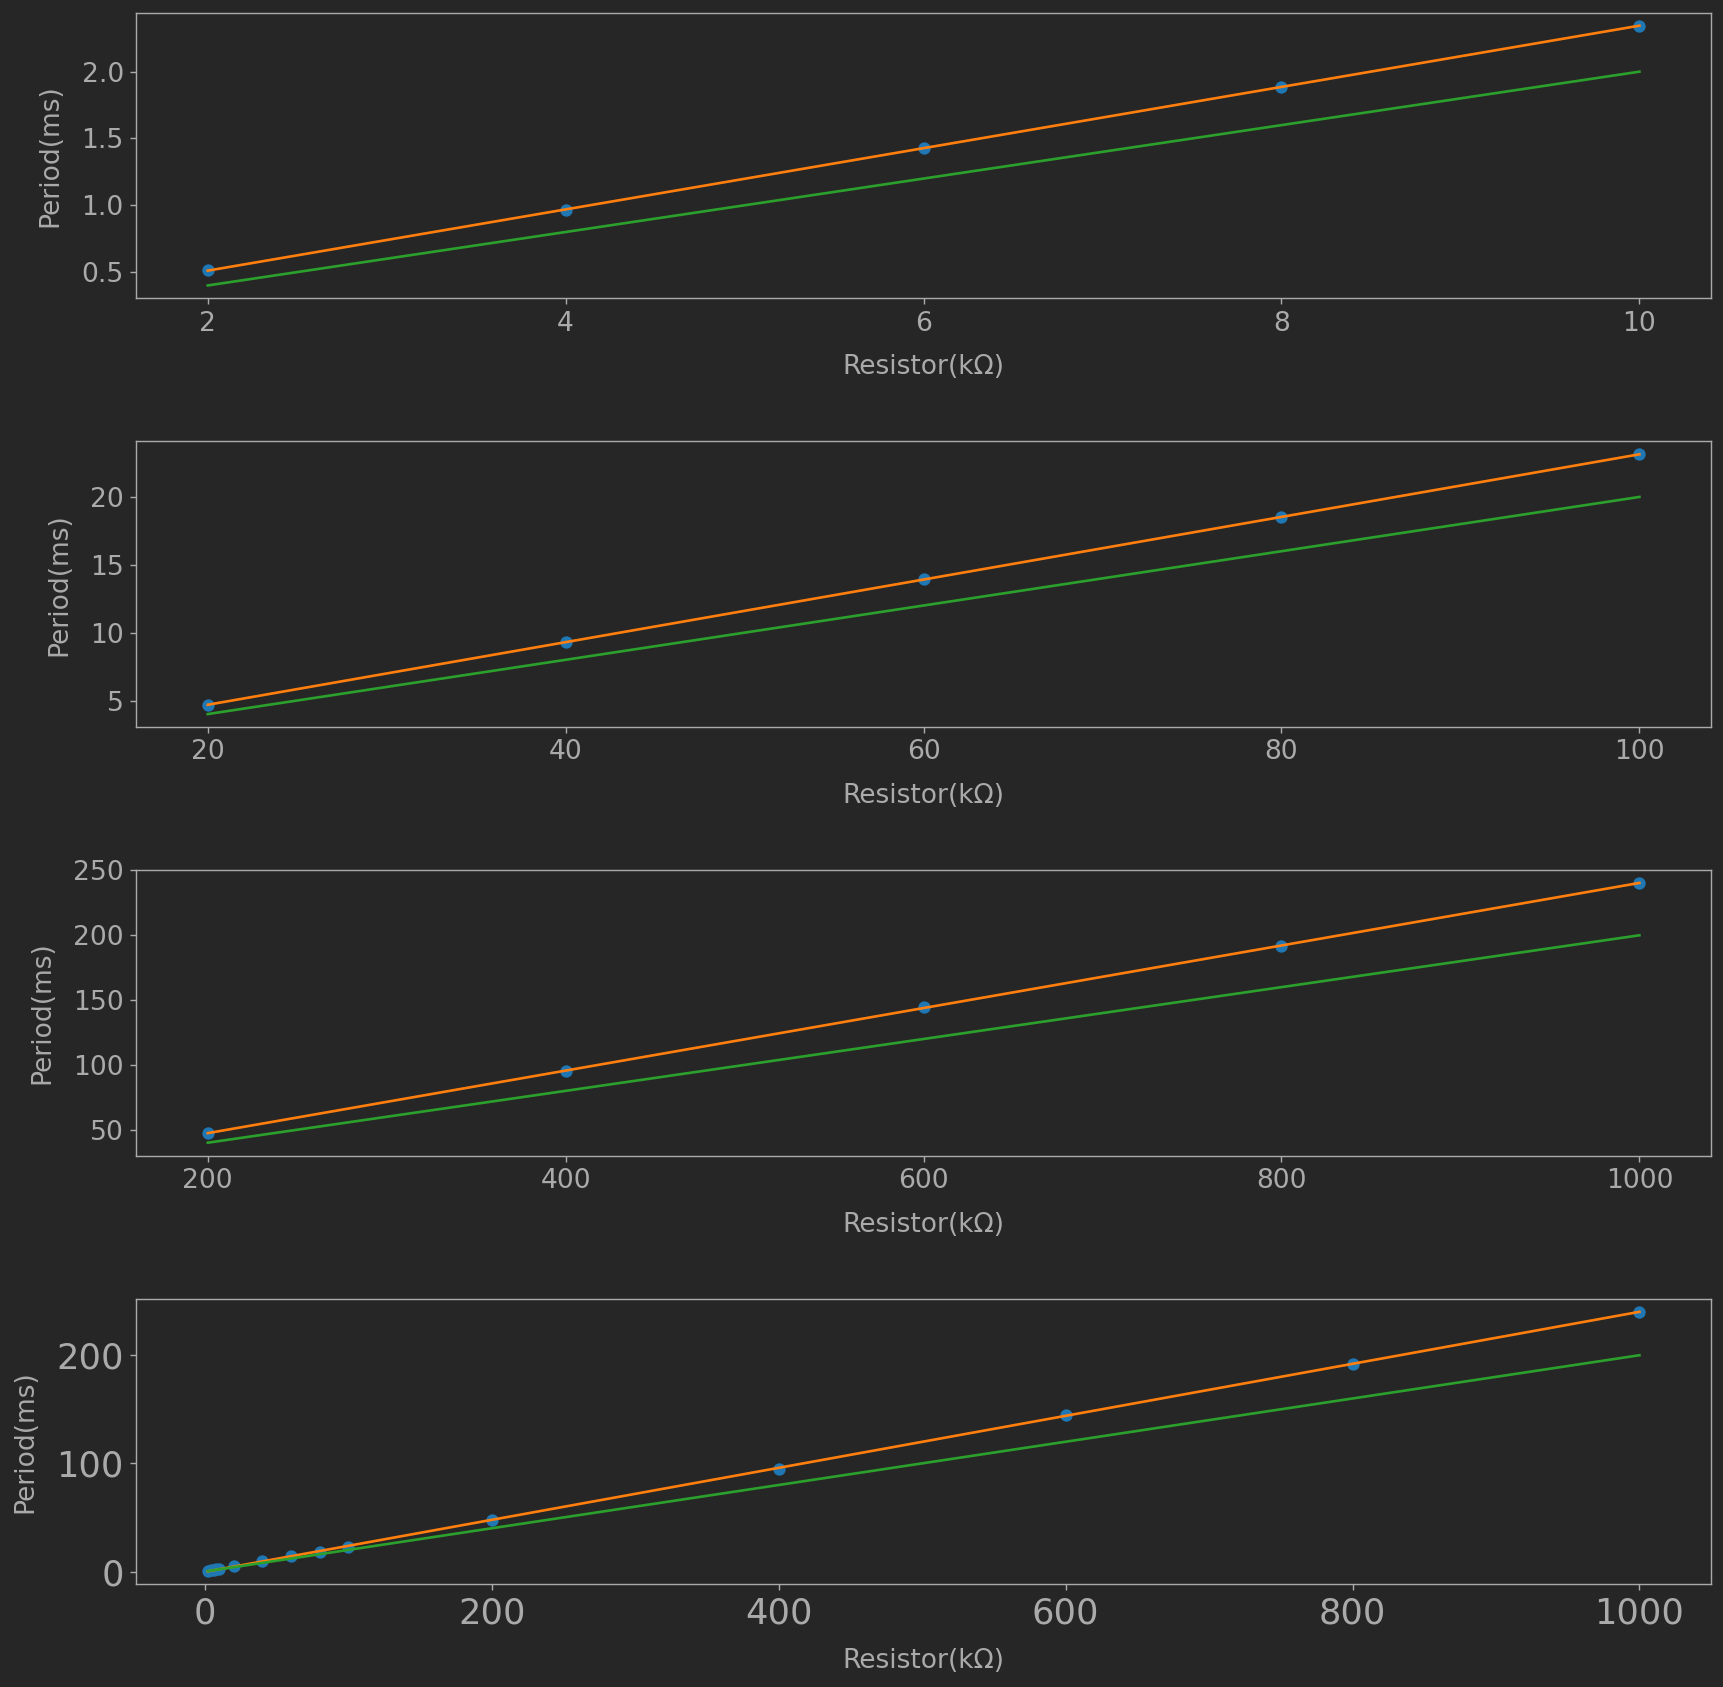

In [ ]:
plt.figure(figsize=(16,9), dpi=127)

for i in range(3):
  plt.subplot(4,1,i+1)
  plt.xlabel('Resistor(kΩ)',labelpad=10)
  plt.ylabel('Period(ms)',labelpad=10)
  plt.plot(x[i]/1000, y[i]*1000, 'o')
  plt.plot(x[i]/1000, 1000*(m[i]*x[i]*C + b[i]))
  plt.plot(x[i]/1000,2000*x[i]*C)
  plt.xticks(Rk[i])

plt.subplot(4,1,4)
plt.xlabel('Resistor(kΩ)',labelpad=10)
plt.ylabel('Period(ms)',labelpad=10)
plt.plot(xn/1000, yn*1000, 'o')
plt.plot(xn/1000, 1000*(m[-1]*xn*C + b[-1]))
plt.plot(xn/1000,2000*xn*C)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplots_adjust(hspace=0.5,top=1.5)

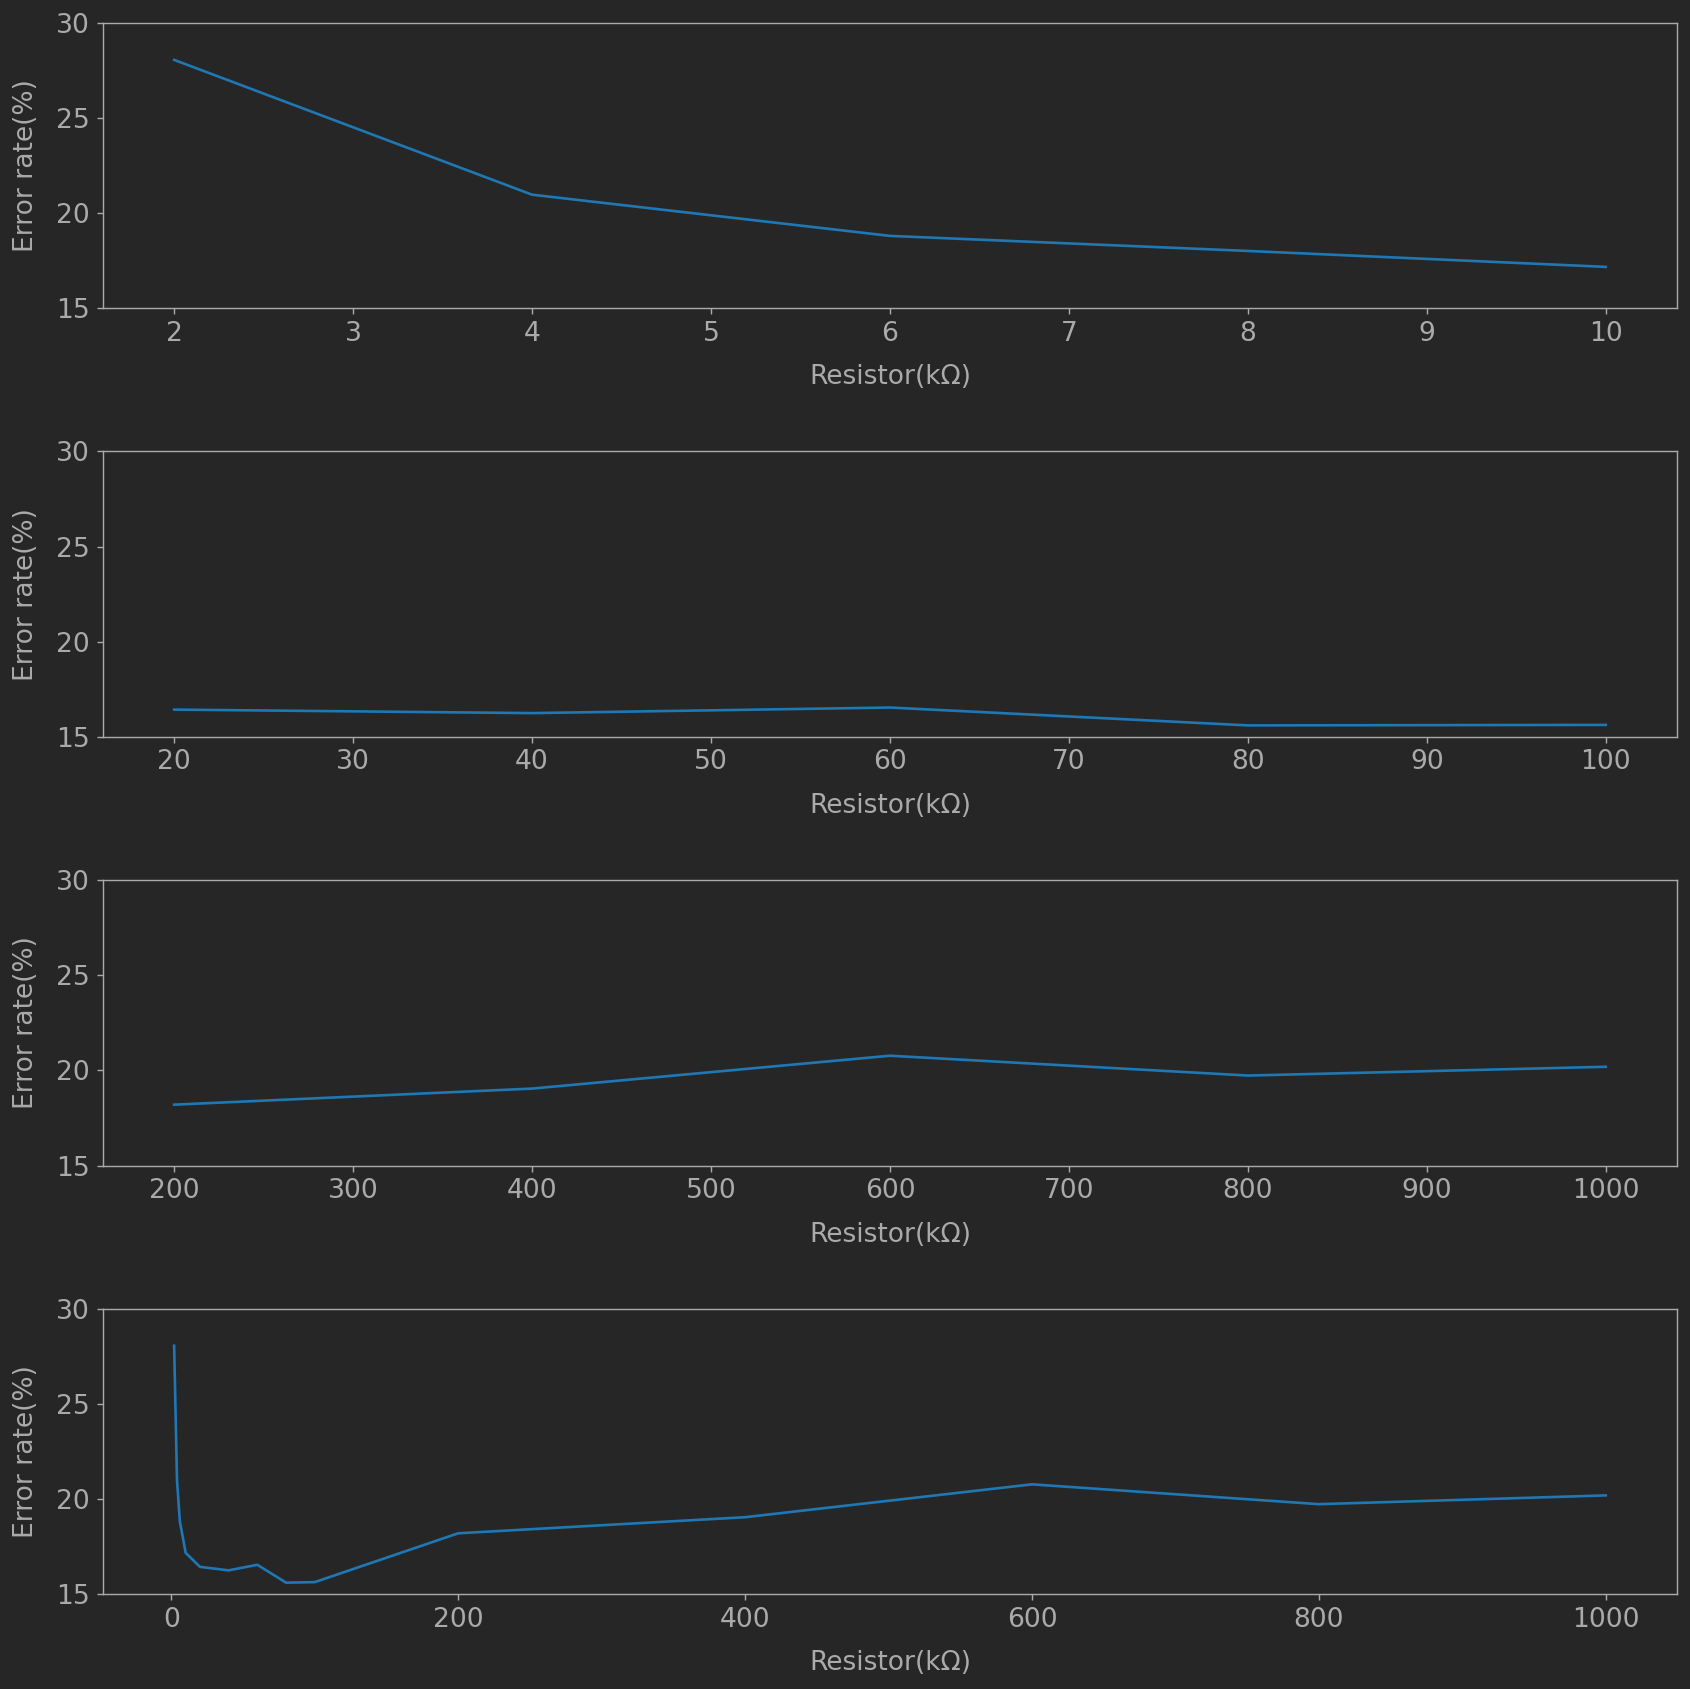

In [ ]:
plt.figure(figsize=(16,9), dpi=127)

#plot seperately
for i in range(3):
  plt.subplot(4,1,i+1)
  plt.xlabel('Resistor(kΩ)',labelpad=10)
  plt.ylabel('Error rate(%)',labelpad=10)
  plt.plot(Rk[i],Err[i])
  plt.ylim(15,30)

plt.subplot(4,1,4)
plt.xlabel('Resistor(kΩ)',labelpad=10)
plt.ylabel('Error rate(%)',labelpad=10)
plt.plot(Rkn,Errn)
plt.ylim(15,30)


plt.subplots_adjust(hspace=0.5,top=1.5)